# Milestones 1

### Dataset

Dataset yang digunakan pada project ini adalah dataset `ml_datasets` dari database bernama `credit_card_default` yang diperoleh dari [Google Cloud Platform](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table) klik untuk langsung menuju ke dataset.

Data yang digunakan berdasarkan kriteria sebagai berikut:
- **HANYA** kolom `limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month`.
- Limit jumlah data menjadi sebanyak `nomor batch dikali dengan tahun lahir`. Batch 16 dan lahir tahun 1997, 16 x 1997 = 31952.

### Query Google Cloud Platform

**SELECT** limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month **FROM** `bigquery-public-data.ml_datasets.credit_card_default` **LIMIT** 31952

# i. Perkenalan

- Nama : Sri Wahyuni
- Batch : FTDS-016-RMT

### Latar Belakang 
- Perusahaan sedang meningkatkan pangsa pasar dengan cara mempermudah proses pembuatan kartu kredit secara berlebihan kepada konsumen yang tidak memenuhi syarat. Hal ini mengakibatkan banyaknya konsumen menunggak (gagal bayar). Sehingga perusahaan ingin mengidentifikasi pendorong utama yang menentukan kemungkinan konsumen gagal bayar bulan selanjutnya.

### Problem Statement
- Identifikasi pendorong utama yang menentukan kemungkinan default kartu kredit dan memprediksi kemungkinan terjadinya default kartu kredit bagi nasabah Bank berdasarkan data selama 6 bulan yaitu bulan april sampai dengan september.

### Penjabaran Masalah
- Apakah gagal bayar kartu kredit lebih banyak dibandingkan dengan yang berhasil bayar?
- Apakah Usia mempengaruhi seseorang mengalami gagal bayar? 
- Apakah pendidikan berdampak pada gagal bayar kartu kredit?
- Asumsi: dalam pernikahan biasanya banyak pengeluaran dan ada dana tidak terduga yang akan dikeluarkan sehingga mengakibatkan gagal bayar?
- Apakah pemiliki limit balance kecil memiliki kemungkinan yang besar juga untuk gagal bayar?

### Tabel informasi 

| Tabel | Keterangan |
| --- | --- |
| limit_balance | Amount of given credit in NT dollars (includes individual and family/supplementary credit |
| sex | Gender (1=male, 2=female) |
| education_level | Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) |
| marital_status | Marital status (1=married, 2=single, 3=others) |
| age | Age in years |
| pay_0 | Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above) |
| pay_2 | Repayment status in August, 2005 (scale same as above) |
| pay_3 | Repayment status in July, 2005 (scale same as above) |
| pay_4 | Repayment status in June, 2005 (scale same as above) |
| pay_5 | Repayment status in May, 2005 (scale same as above) |
| pay_6 | Repayment status in April, 2005 (scale same as above) | 
| bill_amt_1 | Amount of bill statement in September, 2005 (NT dollar) |
| bill_amt_2 | Amount of bill statement in August, 2005 (NT dollar) |
| bill_amt_3 | Amount of bill statement in July, 2005 (NT dollar) |
| bill_amt_4 | Amount of bill statement in June, 2005 (NT dollar) |
| bill_amt_5 | Amount of bill statement in May, 2005 (NT dollar) |
| bill_amt_6 | Amount of bill statement in April, 2005 (NT dollar) |
| pay_amt_1 | Amount of previous payment in September, 2005 (NT dollar) |
| pay_amt_2 | Amount of previous payment in August, 2005 (NT dollar) |
| pay_amt_3 | Amount of previous payment in July, 2005 (NT dollar) |
| pay_amt_4 | Amount of previous payment in June, 2005 (NT dollar) |
| pay_amt_5 | Amount of previous payment in May, 2005 (NT dollar) |
| pay_amt_6 | Amount of previous payment in April, 2005 (NT dollar) |
| default_payment_next_month | Default payment (1=yes, 0=no) |

# ii. Import Libraries

Pada Project kali ini akan menggunakan library **Pandas**, **Numpy**, **Matplotlib**, **Seaborn** dan **Scikit-Learn**

In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score

# iii. Data Loading

Mengupload Dataset yang sudah diperoleh menjadai DataFrame

In [352]:
data = pd.read_csv(r'C:\Users\wSatrian\github-classroom\H8-Assignments-Bay\p1---ftds-016-rmt--ml1-swhyuni\h8dsft_P1M1_Sri_wahyuni.csv')

In [353]:
# menampilkan semua kolom
pd.set_option('display.max_columns', None)

Menampilkan 5 data teratas

In [354]:
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,-1,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,-2,399,2430,0,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0


Menampilkan 5 Data Terbawah

In [355]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000,1,2,1,41,1,-2,-2,-2,-2,-2,0,0,0,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,-1,628,662,596,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,0,13429,14502,15564,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,0,42856,29248,17775,17833,18246,18642,1300,1600,650,700,700,700,0
2964,100000,2,1,2,28,0,0,0,2,0,0,10886,11697,14479,10775,10998,12655,1300,3005,0,700,2000,1500,0


Mengecek informasi Data

In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Dari data tersebut diperoleh beberapa informasi:
- Terdiri dari 2965 **bariS**
- Terdiri dari 24 **kolom**
- Semua kolom bertipe **interger**
- **Tidak** ada missing value

Mengecek data duplicate

In [357]:
data.duplicated().sum()

1

In [358]:
data[data.duplicated()]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
1754,200000,2,1,1,34,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0


Pada dataset ini terdapat 1 data duplicate sehingga akan di hapus 

In [359]:
data = data.drop_duplicates(keep='first')

In [360]:
data.duplicated().sum()

0

Data sudah bersih dari data duplikat

In [361]:
data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2.964000e+03,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,163356.950067,1.607625,1.849865,1.560054,35.193657,0.004723,-0.121795,-0.141026,-0.184548,-0.224696,-0.254049,52135.889001,50666.241228,48256.032726,44104.558367,40969.898448,39786.491228,6351.044872,6.274611e+03,5152.234818,4562.914980,4914.944332,5384.517544,0.214238
std,125049.701016,0.488362,0.778159,0.522304,9.110949,1.114434,1.180479,1.183337,1.178049,1.158739,1.167061,72334.536115,70790.828470,68151.445516,61912.600106,58276.878626,57308.498646,20888.933729,2.888432e+04,14289.177313,13283.476236,16736.920951,17278.585006,0.410362
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3979.750000,3403.500000,3311.750000,2585.000000,1974.500000,1433.000000,1013.000000,9.975000e+02,479.250000,313.750000,325.250000,175.250000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24325.000000,23169.000000,21549.500000,19895.000000,18819.500000,18511.500000,2238.000000,2.182500e+03,1997.000000,1600.000000,1646.500000,1626.500000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69863.000000,67836.250000,63034.500000,58638.500000,53414.500000,52297.000000,5089.500000,5.000000e+03,4500.000000,4000.250000,4021.000000,4081.750000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Berdasarkan describe data diatas diperoleh beberapa informasi:
- Distribusi tidak normal dilihat banyak nilai mean lebih besar daripada median
- Terdapat nilai -2 dan 0 pada kolom pay_n hal ini cukup aneh karena tidak ada penjelasan untuk kriteri -2 dan 0. Hal ini akan dilihat melalui **EDA**
- Default payment next month cukup sediki yaitu hanya sekitar 21%
- Rentan usia yang memiliki kartu kredit yaitu usia 21 - 69 tahun

Untuk mempermudah dalam analisa nama kolom akan diubah

In [362]:
data.rename(columns={'default_payment_next_month' : 'default', 'pay_0' : 'pay_sept', 'pay_2' : 'pay_aug', 'pay_3' : 'pay_jul', 'pay_4' : 'pay_jun', 'pay_5' : 'pay_may', 'pay_6' : 'pay_apr', 'bill_amt_1' : 'bill_amt_sep', 'bill_amt_2' : 'bill_amt_aug', 'bill_amt_3' : 'bill_amt_jul', 'bill_amt_4' :'bill_amt_jun', 'bill_amt_5' : 'bill_amt_may', 'bill_amt_6' : 'bill_amt_apr', 'pay_amt_1' : 'pay_amt_sep', 'pay_amt_2' : 'pay_amt_aug', 'pay_amt_3' : 'pay_amt_jul', 'pay_amt_4' : 'pay_amt_jun', 'pay_amt_5' : 'pay_amt_may', 'pay_amt_6' : 'pay_amt_apr'}, inplace=True)

In [363]:
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_sept,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default
0,50000,1,3,0,50,0,0,0,-1,-1,-1,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,-2,399,2430,0,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0


# iv. Exploratory Data Analysis (EDA)

### Defaulth (Target)

In [364]:
data['default'].unique()

array([0, 1], dtype=int64)

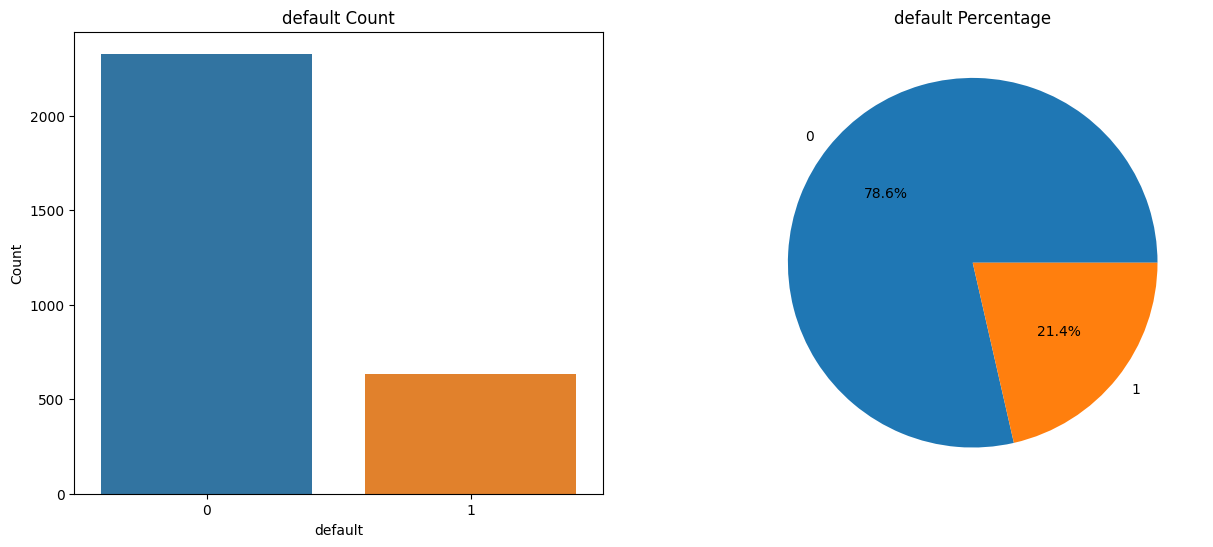

In [365]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='default', data=data)
plt.title('default Count')
plt.xlabel('default')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(data.default.value_counts(), labels=data.default.value_counts().index, autopct='%1.1f%%')
plt.title('default Percentage')
plt.show()

Kolom `default` adalah kolom yang merepresentasikan konsumen mengalami default (gaagl bayar) atau tidak dengan classification nilai 1 **yes** (default payment next month) dan 0 **no** (tidak mengalami default payment next month). Pada data ini yang mengalami gagal banyar lebih sedikit yaitu 21.4% dan 78.6% berhasil melakukan pembayaran. perbandingan yang cukup jauh sehingga data ini termasuk kedalam  **imbalance** data.

### Age

In [366]:
print(f'Number of unique values in Age: {data.age.nunique()}')
print(f'Uniqe values in Age: {data.age.unique()}')

Number of unique values in Age: 49
Uniqe values in Age: [50 45 41 42 34 49 43 35 58 39 48 24 36 40 26 31 29 28 47 55 38 66 37 30
 23 61 53 33 46 25 21 27 44 52 54 63 56 69 57 51 32 65 64 67 59 60 68 22
 62]


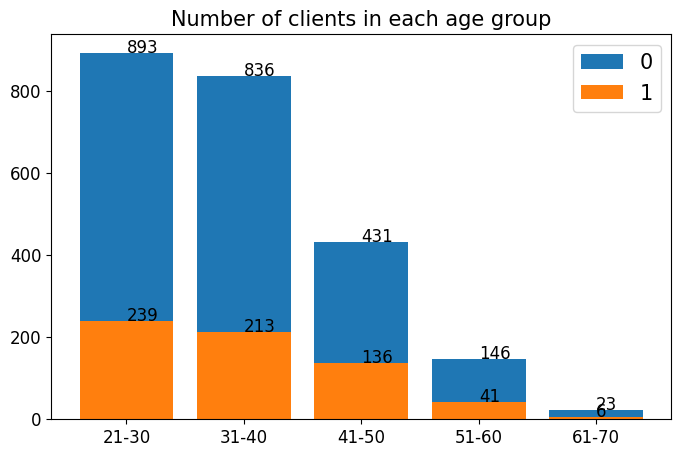

In [367]:
bins = [20,30,40,50,60,70]
names = ['21-30','31-40','41-50','51-60','61-70']
data['age_bins'] = pd.cut(x=data.age, bins=bins, labels=names, right=True)

age_cnt = data.age_bins.value_counts()
age_0 = (data.age_bins[data['default'] == 0].value_counts())
age_1 = (data.age_bins[data['default'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=data, x='age_bins', y='LIMIT_BAL', hue='default', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

Pengguna kartu kredit paling banyak di usia 21-30 dan 31-40 tahun hal ini menjadikan pada usia tersebut yang paling banyak terjadinya gagal bayar. sehingga hal ini menjadikan usia berpengaruh terhadap pembayaran kartu kredit. 

### Education_level

In [368]:
print(f'Number of unique values in Age: {data.education_level.nunique()}')
print(f'Uniqe values in Age: {data.education_level.unique()}')

Number of unique values in Age: 7
Uniqe values in Age: [3 1 2 5 6 4 0]


Berdasarkan informasi tabel diatas value 0, 5 dan 6 adalah unknow sehingga akan saya gabungkan dengan value 4.

In [369]:
fil = (data['education_level'] == 0) | (data['education_level'] == 5) | (data['education_level'] == 6)
data.loc[fil, 'education_level'] = 4
data['education_level'].value_counts()

2    1400
1    1038
3     483
4      43
Name: education_level, dtype: int64

Merubah nama kategori sesuai tabel informasi yang tersedia diatas

In [370]:
data.replace({'education_level' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}}, inplace=True)

<AxesSubplot: xlabel='education_level', ylabel='count'>

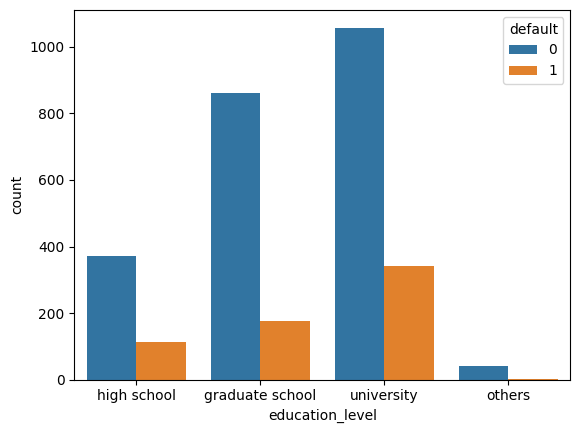

In [371]:
sns.countplot(x='education_level', hue='default', data=data)

Konsumen dengan pendidikan universitas paling banyak mengalami gagal bayar. histogram plot diatas menyatakan semakin tinggi pendidikan semakin banyak yang menggunakan kartu kredit sehinggal education_level berpengaruh terhadap default.

### Marital Status

In [372]:
print(f'Number of unique values in marital_status: {data.marital_status.nunique()}')
print(f'Uniqe values in marital_status: {data.marital_status.unique()}')

Number of unique values in marital_status: 4
Uniqe values in marital_status: [0 1 2 3]


In [373]:
data.loc[data['marital_status']==0, 'marital_status'] = 3
data['marital_status'].value_counts()

2    1594
1    1331
3      39
Name: marital_status, dtype: int64

In [374]:
data.replace({'marital_status' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<AxesSubplot: xlabel='marital_status', ylabel='count'>

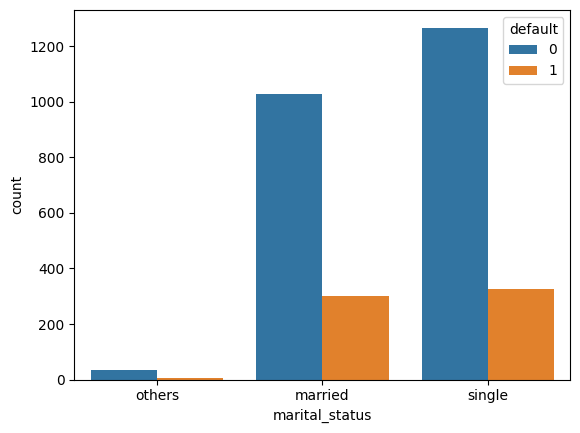

In [375]:
sns.countplot(x='marital_status', hue='default', data=data)

Konsumen yang single paling banyak menggunakan kartu kredit tetapi hal ini tidak membuat konsumen single mengalami gagal bayar. karna datanya hampir sama dengan konsumen yang menikah. saya asumsikan bahwa kosumen yang sudah menikah tidak berpengaruh terhadap terjadinya gagal bayar kartu kredit

### Limit balance

In [376]:
print(f'Number of unique values in limit_balance: {data.limit_balance.nunique()}')
print(f'Uniqe values in limit_balance: {data.limit_balance.unique()}')

Number of unique values in limit_balance: 59
Uniqe values in limit_balance: [ 50000 200000 130000 230000 140000  20000  90000 500000 180000 400000
 100000 300000 150000  80000 470000 460000  70000 160000  30000 780000
 250000 220000 210000 420000 170000 320000 280000 110000 510000 240000
 410000 190000 260000 290000 380000 390000 340000 270000 360000 120000
 490000  60000 330000 350000  40000 310000 480000 440000 700000  10000
 750000 530000 450000 800000 370000 560000 430000 620000 680000]


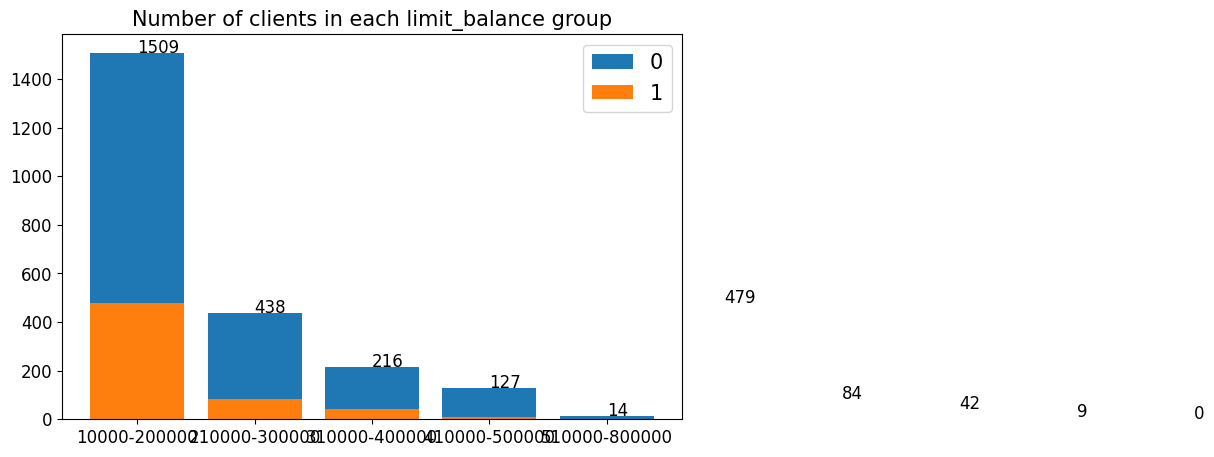

In [377]:
bins2 = [10000,200000,300000,400000,500000,800000]
names2 = ['10000-200000','210000-300000','310000-400000','410000-500000','510000-800000']
data['limit_balance_bins2'] = pd.cut(x=data.limit_balance, bins=bins2, labels=names2, right=True)

limit_balance_cnt = data.limit_balance_bins2.value_counts()
limit_balance_0 = (data.limit_balance_bins2[data['default'] == 0].value_counts())
limit_balance_1 = (data.limit_balance_bins2[data['default'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=data, x='limit_balance_bins2', y='LIMIT_BAL', hue='default', ci=0)
plt.bar(limit_balance_0.index, limit_balance_0.values, label='0')
plt.bar(limit_balance_1.index, limit_balance_1.values, label='1')
for x,y in zip(names2,limit_balance_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,limit_balance_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each limit_balance group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

Konsumen dengan limit balance kecil memiliki kemungkinan besar untuk gagal banyar 

In [378]:
# function to create histogram and boxplt
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    sns.histplot(df[variable])
    plt.title('Histogram')

    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()
    print('\nSkewness Value: ', df[variable].skew())

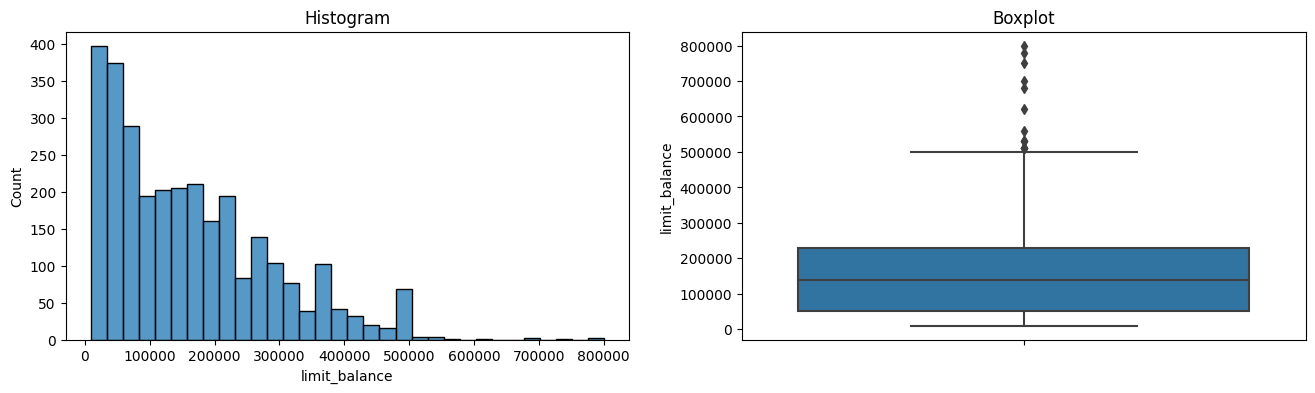


Skewness Value:  1.0006047564306488


In [379]:
diagnostic_plots(data, 'limit_balance')

limit_balance berdistribusi tidak normal dan terdapat oulier 

### Korelasi dengan target

Pada bagian ini akan mengecek korelasi antara variabel

<AxesSubplot: >

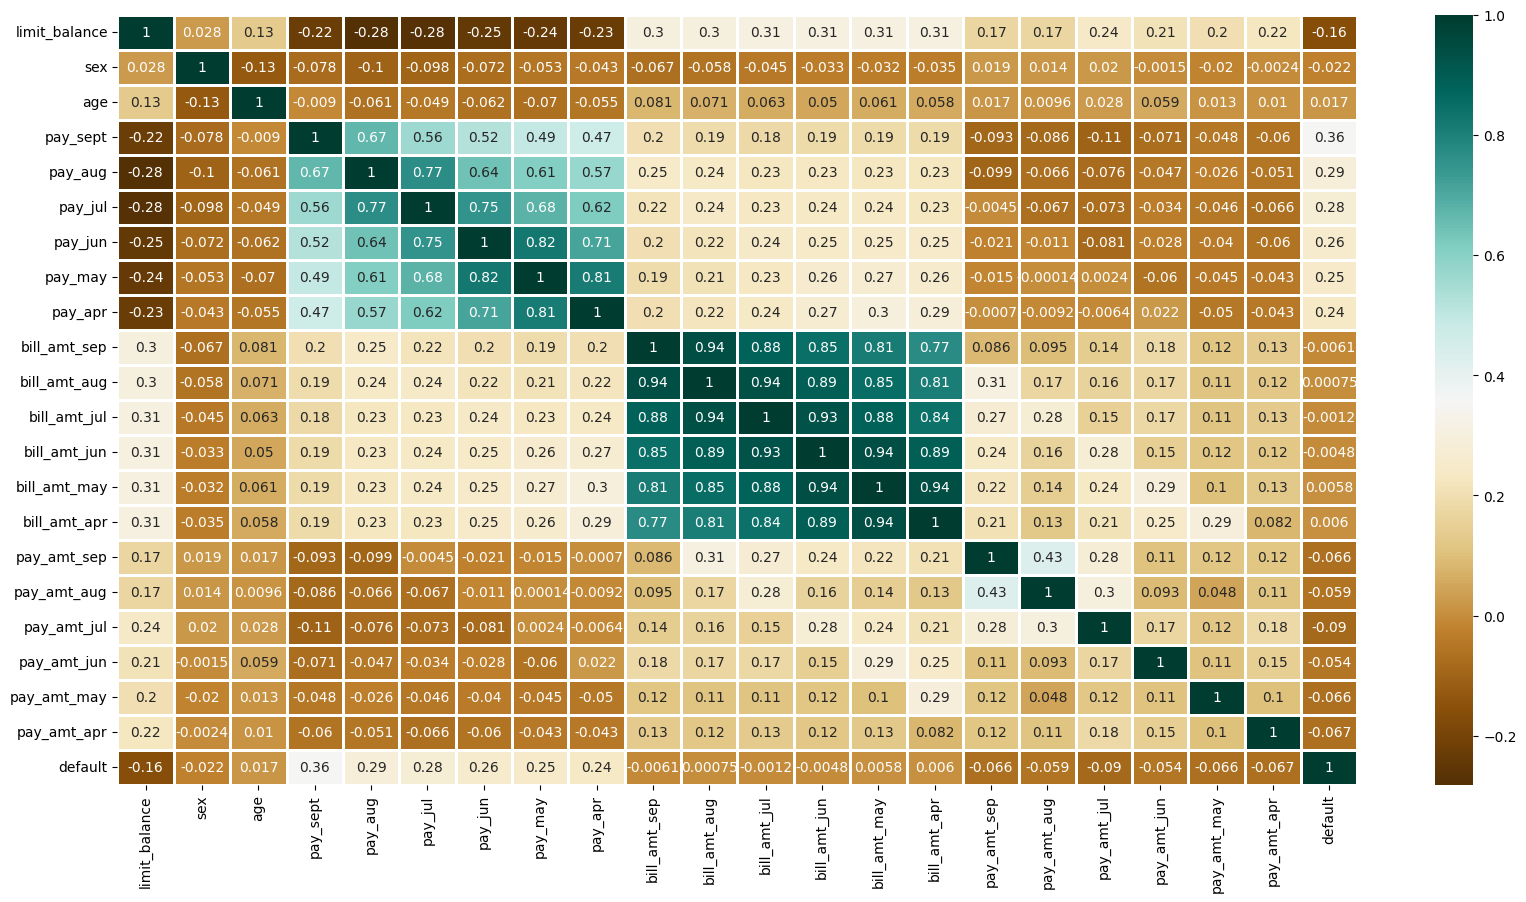

In [380]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),
                cmap = 'BrBG',
                linewidths= 2,
                annot = True)

Dari hasil heatmap korelasi feature yang memiliki korelasi adalah kategori pay status yang terdiri dari pay_apr sampaing dengan pay_sept hal ini dikarena pada pay status ini terdapat recording (keteranga) pembayaran bulan sebelumnya.

# v. Data Preprocessing

## Memisahkan Data untuk Model Inference

Dikarenakan memiliki keterbatasan data sehingga kita akan memisahkan model inference yang nantinya akan digunakan untuk test model

In [381]:
data_inf = data.sample(10, random_state=13)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_sept,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default,age_bins,limit_balance_bins2
2051,100000,2,university,single,30,1,-2,-2,-2,-2,-2,-4,-4,-4,-4,-4,-4,0,0,0,0,0,0,0,21-30,10000-200000
2809,250000,2,university,single,26,0,0,0,0,0,0,70522,72062,73511,75314,74172,71933,2667,2700,3000,5000,2800,1800,0,21-30,210000-300000
445,200000,2,university,married,34,-2,-2,-2,-1,-1,-1,6626,2469,3760,4273,3015,5076,2476,3771,4285,3023,5088,6282,0,31-40,10000-200000
1382,210000,2,graduate school,single,37,-1,-1,-1,-1,0,0,430,1570,17036,73158,46823,1427,1570,17036,73158,936,29,630,0,31-40,210000-300000
1657,150000,2,high school,married,48,2,2,2,2,2,2,84647,76858,62650,59255,45983,52986,5950,0,10000,0,20000,0,1,41-50,10000-200000
1472,80000,2,graduate school,single,22,-1,-1,-1,-1,-1,0,1807,133,5395,1182,266,366,133,5395,1182,266,233,0,0,21-30,10000-200000
2281,50000,2,university,single,23,0,0,0,0,0,0,49026,48983,38417,27038,26254,26352,1748,1408,1000,1000,1000,1000,0,21-30,10000-200000
2082,360000,2,university,single,43,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,84216,0,41-50,310000-400000
2695,50000,2,graduate school,single,29,0,0,0,0,0,0,8838,7662,40125,37552,22960,14735,6540,37130,2858,3000,1000,5000,0,21-30,10000-200000
2891,370000,1,graduate school,single,30,0,0,0,0,0,0,333930,280727,285705,295747,250158,255956,13000,11000,15000,10000,10000,12000,0,21-30,310000-400000


seteleha mendapatkan data inference langkah selanjutnya kita akan meremove data inference dari dataset

In [382]:
data_train_test = data.drop(data_inf.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_sept,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default,age_bins,limit_balance_bins2
0,50000,1,high school,others,50,0,0,0,-1,-1,-1,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0,41-50,10000-200000
1,200000,2,high school,others,45,-2,-2,-2,-2,-2,-2,399,2430,0,399,1396,0,2430,0,399,1396,0,0,0,41-50,10000-200000
2,130000,1,graduate school,married,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0,41-50,10000-200000
3,230000,1,university,married,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1,41-50,210000-300000
4,50000,1,university,married,42,0,0,0,0,0,2,35892,32546,30660,31320,36227,35569,2007,2000,1500,5400,0,3000,0,41-50,10000-200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000,1,university,married,41,1,-2,-2,-2,-2,-2,0,0,0,0,700,860,0,0,0,700,860,2420,1,41-50,310000-400000
2961,20000,1,graduate school,married,39,-1,-1,-1,-1,-1,-1,628,662,596,630,664,598,700,600,700,700,600,1400,0,31-40,10000-200000
2962,20000,1,university,single,25,0,0,0,0,0,0,13429,14502,15564,16600,17025,17381,1300,1300,1300,700,630,650,0,21-30,10000-200000
2963,50000,1,university,single,38,0,0,0,0,0,0,42856,29248,17775,17833,18246,18642,1300,1600,650,700,700,700,0,31-40,10000-200000


Kita sudah berhasil meremove data inference dari data sehingga jumlah bari sebelumnya adalah 2965 menjadi 2955 baris.

selanjutnya kita akan mereset index untuk meminimalisir hal-hal yang tidak diinginkan dikemudian hari

In [383]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## Split Data

### Memisahkan feature(X) dan target (y)

In [384]:
X = data_train_test.drop(['default'], axis=1)
y = data_train_test['default']

### Memisahkan Data Train set dan Test set

Pada project kali ini data akan dibagi menjadi 2 dengan perbandingan **8:2**, dimana:

- 80% data menjadi **training set**
- 20% data menjadi **validation set**

Pada saat **EDA** mendapati bahwa data imblance sehingga pada split data akan menggunakan parameter 'stratify' agar proporsi label terjaga.

In [387]:
df_train, df_test = train_test_split(data_train_test, test_size=0.2, random_state=13, stratify=y)

## Handling Missing Value

In [388]:
df_train.isna().sum()

limit_balance           0
sex                     0
education_level         0
marital_status          0
age                     0
pay_sept                0
pay_aug                 0
pay_jul                 0
pay_jun                 0
pay_may                 0
pay_apr                 0
bill_amt_sep            0
bill_amt_aug            0
bill_amt_jul            0
bill_amt_jun            0
bill_amt_may            0
bill_amt_apr            0
pay_amt_sep             0
pay_amt_aug             0
pay_amt_jul             0
pay_amt_jun             0
pay_amt_may             0
pay_amt_apr             0
default                 0
age_bins                0
limit_balance_bins2    34
dtype: int64

In [389]:
df_test.isna().sum()

limit_balance           0
sex                     0
education_level         0
marital_status          0
age                     0
pay_sept                0
pay_aug                 0
pay_jul                 0
pay_jun                 0
pay_may                 0
pay_apr                 0
bill_amt_sep            0
bill_amt_aug            0
bill_amt_jul            0
bill_amt_jun            0
bill_amt_may            0
bill_amt_apr            0
pay_amt_sep             0
pay_amt_aug             0
pay_amt_jul             0
pay_amt_jun             0
pay_amt_may             0
pay_amt_apr             0
default                 0
age_bins                0
limit_balance_bins2    12
dtype: int64

Terdapat missing value limit_balance_bins 2 ini terjadi karena pada saat eda. limit_balance ini tidak akan digunakan maka akan diramove pada saat **feacture selection**

## Feature Selection

Berdasarkan hasil **EDA** yang sudah dilakukan, ada beberapa kolom yang akan dijadikan feature yaitu:  `education_level`, `pay_apr`, `pay_may`, `pay_jun`, `pay_jul`, `pay_aug`, `pay_sept`

In [390]:
X_train = df_train[['education_level','pay_sept', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_apr']]
y_train = df_train.default
X_test = df_test[['education_level','pay_sept', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_apr']]
y_test = df_test.default

### Split Numerical and Categorical columns

In [391]:
# Numerical Columns
num_cols = X_train.select_dtypes(include=np.number).columns

# Categorical Columns
cat_cols = X_train.select_dtypes(include=['object']).columns

## Pipeline

Pada pipeline ini akan melakukan normalisasi(scalling) menggunakan **StandarScaler** dan encoding menggunakan **OrdinalEncoder** karena kategori memiliki tingkatan 

In [392]:
# Feature Scalling Numeric
num_pipe = Pipeline([('scaling', StandardScaler())])

# Feature Encoding Categorical
cat_pipe = Pipeline([('encoding', OrdinalEncoder())])

# Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', num_pipe, X_train.select_dtypes(include=np.number).columns),
    ('cat', cat_pipe, X_train.select_dtypes(include=['object']).columns),
])

# vi. Model Definition

Sesuai dengan library yang sudah dibuat pada bagian ini akan membuat 7 model yaitu:
- 'log_model' adalah model untuk **Logistic Regression**
- 'svc_model' adalah model untuk **Support Vector Machine**
- 'tree' adalah model untuk **Decisson Tree**
- 'forest' adalah model untuk **Random Forest**
- 'knn' adalah model untuk **K-Nearest Neighbors**
- 'naive' adalah model untuk **Naive Bayes**
- 'xgb' adalah model untuk **Extreme Gradient Boosting**

In [394]:
# Logistic Regression Pipeline
logistic_pipe = Pipeline([('preprocessing', preprocessor), ('classifier', LogisticRegression())])

# Support Vector Machine Pipeline
svc_pipe = Pipeline([('preprocessing', preprocessor), ('classifier', SVC())])

# Decision Tree Pipeline
tree_pipe = Pipeline([('preprocessing', preprocessor), ('classifier', DecisionTreeClassifier())])

# Random Forest Pipeline
forest_pipe = Pipeline([('preprocessing', preprocessor), ('classifier', RandomForestClassifier())])

# K-Nearest Neighbors Pipeline
knn_pipe = Pipeline([('preprocessing', preprocessor), ('classifier', KNeighborsClassifier())])

# Naive Bayes Pipeline
naive_pipe = Pipeline([('preprocessing', preprocessor), ('classifier', GaussianNB())])

# AdaBoost Classifier Pipeline 
xgb_pipe = Pipeline([('preprocessing', preprocessor), ('classifier', XGBClassifier())])

Selanjutnya akan melakukan **hyperparameter tuning** untuk menentukan best parameter yang akan digunakan dimodel

# vii. Model Training

In [395]:
%timeit logistic_pipe.fit(X_train, y_train)
%timeit svc_pipe.fit(X_train, y_train)
%timeit tree_pipe.fit(X_train, y_train)
%timeit forest_pipe.fit(X_train, y_train)
%timeit knn_pipe.fit(X_train, y_train)
%timeit naive_pipe.fit(X_train, y_train)
%timeit xgb_pipe.fit(X_train, y_train)

The slowest run took 4.13 times longer than the fastest. This could mean that an intermediate result is being cached.
22.4 ms ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
137 ms ± 7.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.02 ms ± 355 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
251 ms ± 9.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
10.3 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.13 ms ± 794 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
95.1 ms ± 38.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [396]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_log_model = cross_val_score(logistic_pipe, X_train, y_train, cv=5, scoring="recall")
cv_svm_model = cross_val_score(svc_pipe, X_train, y_train, cv=5, scoring="recall")
cv_dt_model = cross_val_score(tree_pipe, X_train, y_train, cv=5, scoring="recall")
cv_rf_model = cross_val_score(forest_pipe, X_train, y_train, cv=5, scoring="recall")
cv_knn_model = cross_val_score(knn_pipe, X_train, y_train, cv=5, scoring="recall")
cv_nb_model = cross_val_score(naive_pipe, X_train, y_train, cv=5, scoring="recall")
cv_xgb_model = cross_val_score(xgb_pipe, X_train, y_train, cv=5, scoring="recall")

name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_xgb_model],['logistic_pipe','svc_pipe','tree_pipe','forest_pipe','knn_pipe','xgb_model','xgb_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

logistic_pipe
recall - All - Cross Validation  :  [0.21568627 0.32352941 0.25742574 0.24752475 0.22772277]
recall - Mean - Cross Validation :  0.2543777907202485
recall - Std - Cross Validation  :  0.03753857821396255
recall - Range of Test-Set       :  0.21683921250628596 - 0.2919163689342111
--------------------------------------------------
svc_pipe
recall - All - Cross Validation  :  [0.43137255 0.40196078 0.36633663 0.3960396  0.33663366]
recall - Mean - Cross Validation :  0.38646864686468646
recall - Std - Cross Validation  :  0.03236292170687162
recall - Range of Test-Set       :  0.35410572515781485 - 0.41883156857155807
--------------------------------------------------
tree_pipe
recall - All - Cross Validation  :  [0.35294118 0.38235294 0.37623762 0.32673267 0.30693069]
recall - Mean - Cross Validation :  0.34903902154921373
recall - Std - Cross Validation  :  0.028759320288755635
recall - Range of Test-Set       :  0.3202797012604581 - 0.37779834183796934
------------------

Best model yang diperoleh dengan menggunakan Cross Validatian adalah xgb_model. Selanjutnya akan melakukan **hyperparameter tuning** dengan `GridSearchCV()`

In [397]:
from xgboost import XGBClassifier
best_xgb = XGBClassifier(xgb_pipe, n_estimators=200, max_depth=3, learning_rate=0.01, random_state=13, verbosity=0, silent=True, enable_categorical=True)

In [398]:
%timeit xgb_pipe.fit(X_train, y_train)

78.9 ms ± 6.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# viii. Model Evaluation

Pada bagian ini akan dilakukan evaluasi untuk melihat performa Metric evaluation yang akan digunakan adalah F1-score dan ROC-AUC score kerena terdapat label imbalance pada dataset.

In [399]:
xgb_params = {'classifier__n_estimators': [200],
              'classifier__max_depth': [3],
              'classifier__learning_rate': [ 0.01],
              'classifier__use_label_encoder': [False],
              'classifier__objective': ['binary:logistic']}

In [400]:
xgb_new = Pipeline([('preprocessing', preprocessor), ('classifier', XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.01, random_state=23, verbosity=0, silent=True))])

In [401]:
%timeit xgb_new.fit(X_train, y_train)

96.7 ms ± 8.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [402]:
%timeit xgb_pipe.fit(X_train, y_train)

80.7 ms ± 5.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Extreme Gradient Boosting best model

In [403]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score
print('Training Score:', xgb_pipe.score(X_train, y_train))
print('test Score:', xgb_pipe.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, xgb_pipe.predict(X_test)))
xgb_confusion_matrix = confusion_matrix(y_test, xgb_pipe.predict(X_test))

Training Score: 0.8573846804909014
test Score: 0.8358714043993232
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       464
           1       0.69      0.43      0.53       127

    accuracy                           0.84       591
   macro avg       0.78      0.69      0.71       591
weighted avg       0.82      0.84      0.82       591



### Extreme Gradient Boosting new model

In [404]:
print('Training Score:', xgb_new.score(X_train, y_train))
print('test Score:', xgb_new.score(X_test, y_test))
print('------------------------------------------------------')
print(classification_report(y_test, xgb_new.predict(X_test)))
xgb_confusion_matrix_new = confusion_matrix(y_test, xgb_new.predict(X_test))

Training Score: 0.8387642826914938
test Score: 0.8426395939086294
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       464
           1       0.74      0.42      0.53       127

    accuracy                           0.84       591
   macro avg       0.80      0.69      0.72       591
weighted avg       0.83      0.84      0.83       591



In [405]:
xgb_false_positive_rate_test, xgb_true_positive_rate_test, xgb_thresholds_test = roc_curve(y_test, xgb_pipe.predict(X_test))
confusions = [confusion_matrix(y_test, xgb_pipe.predict(X_test))]

In [406]:
xgb_false_positive_rate_test_new, xgb_true_positive_rate_test_new, xgb_thresholds_test_new = roc_curve(y_test, xgb_new.predict(X_test))
confusions_new = [confusion_matrix(y_test, xgb_new.predict(X_test))]

### Confusion Matrix

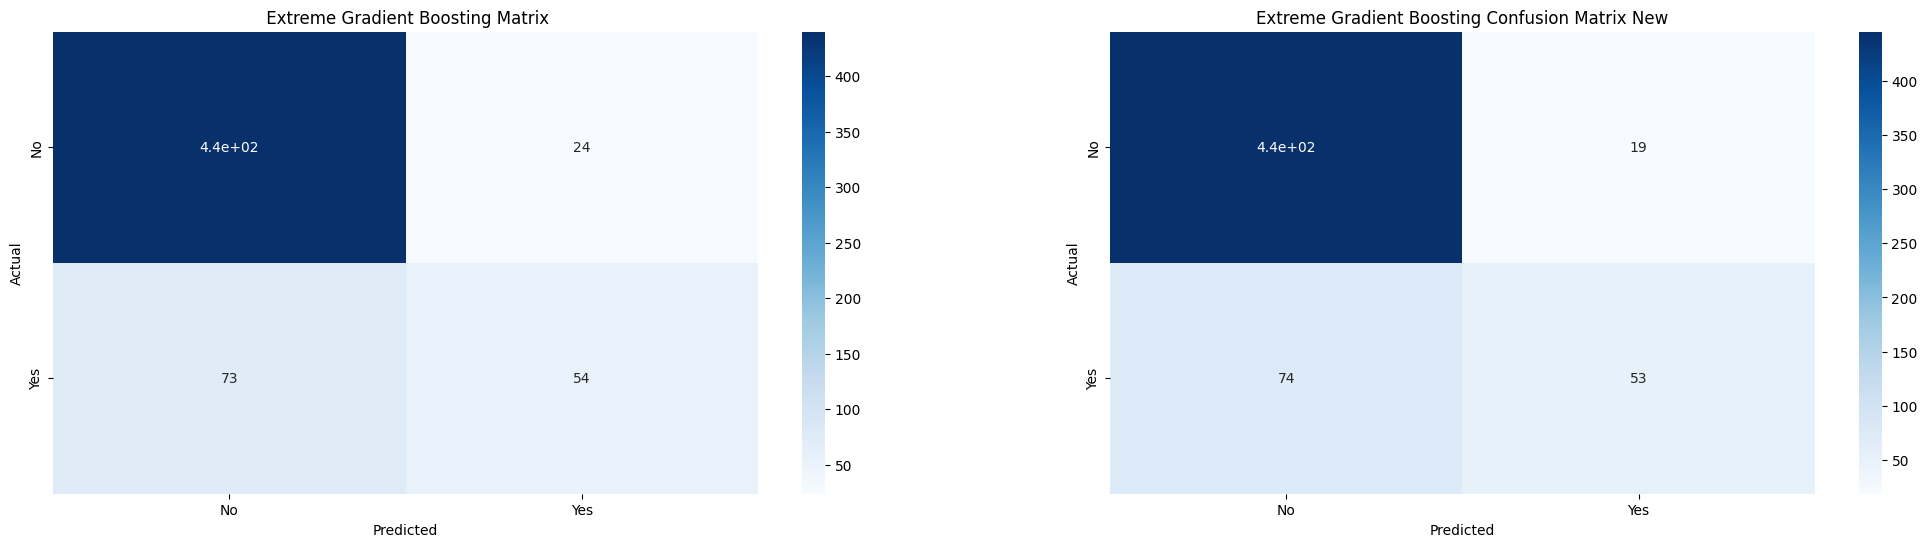

In [414]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
xgb_fig = sns.heatmap(xgb_confusion_matrix, annot=True, cmap='Blues')
plt.title(' Extreme Gradient Boosting Matrix')
xgb_fig.set_xticklabels(['No', 'Yes'])
xgb_fig.set_yticklabels(['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1, 2, 2)
xgb_fig_new = sns.heatmap(xgb_confusion_matrix_new, annot=True, cmap='Blues')
plt.title('Extreme Gradient Boosting Confusion Matrix New')
xgb_fig_new.set_xticklabels(['No', 'Yes'])
xgb_fig_new.set_yticklabels(['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC - AUC

In [408]:
xgb_false_positive_rate_test, xgb_true_positive_rate_test, xgb_thresholds_test = roc_curve(y_test, xgb_pipe.predict(X_test))
xgb_false_positive_rate_test_new, xgb_true_positive_rate_test_new, xgb_thresholds_test_new = roc_curve(y_test, xgb_new.predict(X_test))

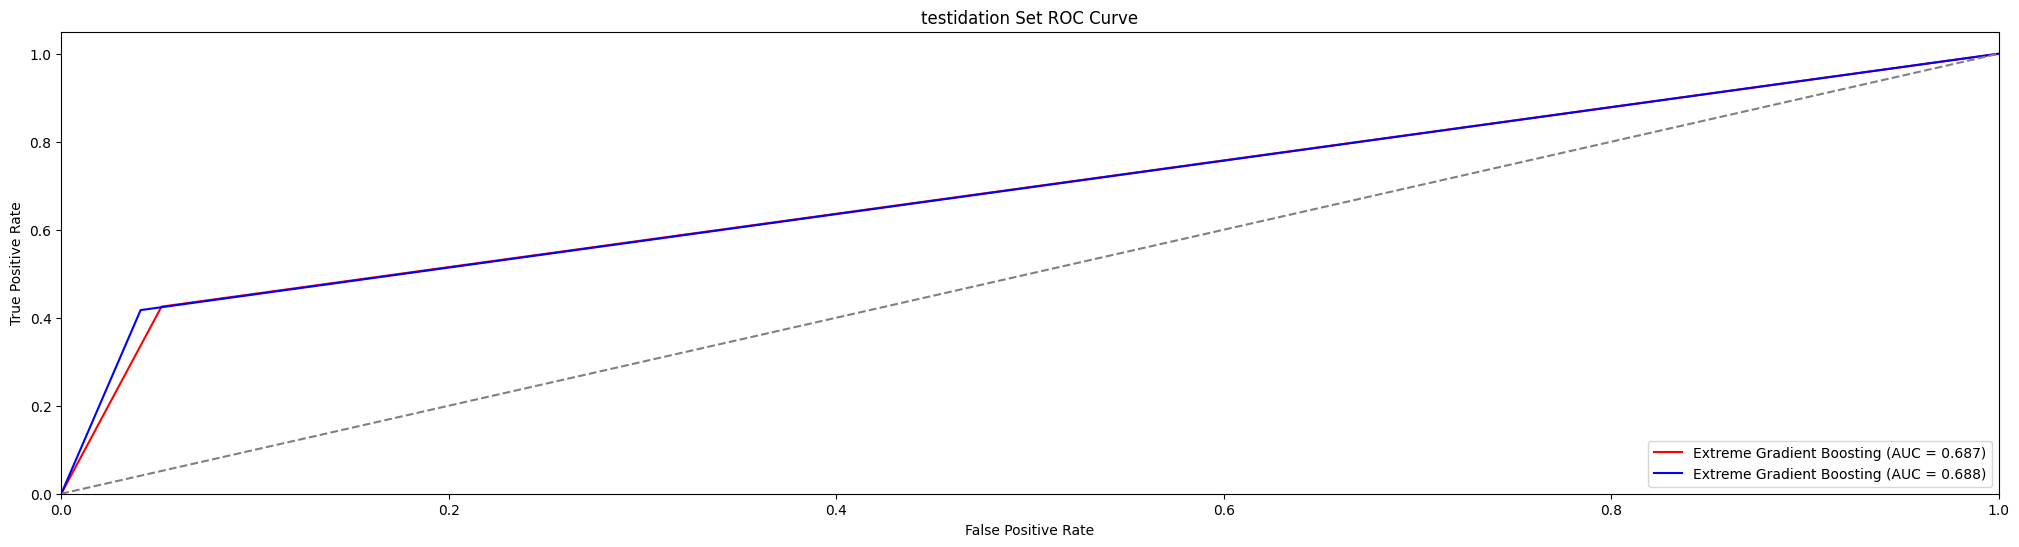

In [409]:
plt.figure(figsize=(25, 6))
plt.plot(xgb_false_positive_rate_test, xgb_true_positive_rate_test, color='red', label=f'Extreme Gradient Boosting (AUC = {roc_auc_score(y_test, xgb_pipe.predict(X_test)):.3f})')
plt.plot(xgb_false_positive_rate_test_new, xgb_true_positive_rate_test_new, color='blue', label=f'Extreme Gradient Boosting (AUC = {roc_auc_score(y_test, xgb_new.predict(X_test)):.3f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('testidation Set ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Model Analysis

Dari hasil evaluasi pada kedua model, dilihat pada confusion matrix prediksi dari kedua model hampir sama, yang membedakan hanya pada model Extreme Gradient Boosting default memprediksi True Negative lebih sedikit sedangkan model Extreme Gradient Boosting New memprediksi True Negative lebih banyak namun perbedaan ini tidak terlalu signifikan. dan, jika dilihat pada ROC-AUC model Extreme Gradient Boosting memili nilai dan kurva yang hampir sama. untuk perbandingan hasil recall dan f1-score sangat jauh hasilnya. hal ini dikarenakan data imbalance

# ix. Model Inference

Pada bagian ini kedua model akan digunakan untuk memprediksi data inference

In [410]:
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_sept,pay_aug,pay_jul,pay_jun,pay_may,pay_apr,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default,age_bins,limit_balance_bins2
0,100000,2,university,single,30,1,-2,-2,-2,-2,-2,-4,-4,-4,-4,-4,-4,0,0,0,0,0,0,0,21-30,10000-200000
1,250000,2,university,single,26,0,0,0,0,0,0,70522,72062,73511,75314,74172,71933,2667,2700,3000,5000,2800,1800,0,21-30,210000-300000
2,200000,2,university,married,34,-2,-2,-2,-1,-1,-1,6626,2469,3760,4273,3015,5076,2476,3771,4285,3023,5088,6282,0,31-40,10000-200000
3,210000,2,graduate school,single,37,-1,-1,-1,-1,0,0,430,1570,17036,73158,46823,1427,1570,17036,73158,936,29,630,0,31-40,210000-300000
4,150000,2,high school,married,48,2,2,2,2,2,2,84647,76858,62650,59255,45983,52986,5950,0,10000,0,20000,0,1,41-50,10000-200000
5,80000,2,graduate school,single,22,-1,-1,-1,-1,-1,0,1807,133,5395,1182,266,366,133,5395,1182,266,233,0,0,21-30,10000-200000
6,50000,2,university,single,23,0,0,0,0,0,0,49026,48983,38417,27038,26254,26352,1748,1408,1000,1000,1000,1000,0,21-30,10000-200000
7,360000,2,university,single,43,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,84216,0,41-50,310000-400000
8,50000,2,graduate school,single,29,0,0,0,0,0,0,8838,7662,40125,37552,22960,14735,6540,37130,2858,3000,1000,5000,0,21-30,10000-200000
9,370000,1,graduate school,single,30,0,0,0,0,0,0,333930,280727,285705,295747,250158,255956,13000,11000,15000,10000,10000,12000,0,21-30,310000-400000


In [411]:
# Split Features and Label
X_test_inf = data_inf[['education_level','pay_sept', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_apr']]
y_test_inf = data_inf.default

In [412]:
# Predict
xgb_pred = xgb_pipe.predict(X_test)
xgb_pred_new = xgb_new.predict(X_test)

In [413]:
# Create DataFrame
xgb_pred = pd.DataFrame(xgb_pred, columns=['XGB_pred'])
xgb_pred_new = pd.DataFrame(xgb_pred_new, columns=['XGB_pred_new'])
predictions = pd.concat([data_inf.default.reset_index(drop=True), xgb_pred, xgb_pred_new], axis=1)
predictions.columns = ['Actual', 'XGB_pred', 'XGB_pred_new']
predictions

,Actual,XGB_pred,XGB_pred_new
0,0.0,0,0
1,0.0,0,0
2,0.0,0,0
3,0.0,0,0
4,1.0,0,0
...,...,...,...
586,NaN,0,0
587,NaN,0,0
588,NaN,0,0
589,NaN,0,0


# x. Pengambilan Kesimpulan

- Project ini untuk memprediksi default kartu pada bulan selanjutnya data  Terdiri dari 2965 **bariS** dan Terdiri dari 24 **kolom** dengan data selama 6 bulan dari bulan april hingga september
- Ditemukan sebanyak 21.4% dari 2965 data gagal melakukan pembayaran dengan rentan usia 21-30 dan 31-40 tahun, Konsumen dengan pendidikan universitas paling banyak mengalami gagal bayar. Konsumen yang single paling banyak menggunakan kartu kredit tetapi hal ini tidak membuat konsumen single mengalami gagal bayar. karna datanya hampir sama dengan konsumen yang menikah
- Berdasarkan hasil Eda ditentukan feature yaitu 'education_level','pay_sept', 'pay_aug', 'pay_jul', 'pay_jun', 'pay_apr'
- Dari 7 model yang di test ditemukan best modelnya Extreme Gradient Boosting yang kemudian ditung dengan parameter baru namun hasilnya kurang memuaskan dikarena hasil tidak jauh berbeda

**Note** sudah melakukan trail dan eror namun hasilnya tidak jauh berbeda dengan default

# Conceptual Problems

_Jawab pertanyaan berikut:_

1. Apakah fungsi parameter `criterion` pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
> Parameter untuk memisahkan atribut, salah satu criterionnya : Gini_index yaitu mengukur ketidaksetaraan antara distribusi karakteristik label. pemisah yang dipilih menghasilkan pengurangan index gini ratarata himpunan bagian yang dihasilkan
2. Apakah fungsi dari `pruning` pada Tree model?
> untuk memangkas/membuang cabang yang tidak diperlukan tujuannya untuk mengurangi tingkat kesalahan prediksi
3. Bagaimana cara memilih `K` yang optimal pada KNN?
> sebaiknya dipertimbangkan sesuai dengan jumlah data, semakin banyak data angka k yang dipilih sebaiknya makin rendah namun semakin besar ukuran dimensi sebaiknya semakin tinggi
4. Jelaskan apa yang kalian ketahui tentang `Cross Validation`!
> metode untuk memperoleh hasil akurasi maksimal dari berbagai macam model yang akan digunakan
5. Jelaskan apa yang kalian ketahui tentang `Accuracy, Precision, Recall, F1 Score`!
> accuracy : tingkat kedekatan antara nilai prediksi dengan akurasi
> Precision: perbandingan antara true positive dengan banyaknya data yang diprediksi, jika dilihat dari variabelnya (false positif)
> Recall : perbandingan antara true positif dengan banyaknya data yang sebenarnya positif, jika dilihat variablenya (false negatif)
>f1 score : rata-rata dari precision dan recall, secara refresentatif jika f1 score mempunyai niai yang baik maka mengidentifikasi bahwa model klasifikasi precision dan recallnya baik

**Referensi** 
- https://www.kaggle.com/code/bansodesandeep/credit-card-default-prediction
- https://www.kaggle.com/code/maxskoryk/sepsis-prediction-from-clinical-data#2.-Feature-Engineering